In [1]:
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('drive')
flood_data = pd.read_csv("drive/My Drive/floodPreproc.csv")

Mounted at drive


In [2]:
#scaler=MinMaxScaler()
y = flood_data["DAMAGE"]
X = flood_data.drop(columns= "DAMAGE")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train = scaler.fit_transform(X_train_unscaled)
# X_test = scaler.fit_transform(X_test_unscaled)

In [3]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
   return lrate

In [4]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(75, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
optimizer = keras.optimizers.Adam(lr=0.01)
NN_model.compile(loss='mean_squared_logarithmic_error', optimizer= optimizer)
NN_model.summary()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                5625      
                                                                 
 dense_1 (Dense)             (None, 32)                2432      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9146 (35.73 KB)
Trainable params: 9146 (35.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(33360, 74)
(33360,)
(8341, 74)
(8341,)


In [5]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, y_test))#,callbacks=[LearningRateScheduler(step_decay)])
predictions = NN_model.predict(X_test)
print(flood_data["DAMAGE"].std())
print(np.sqrt(mean_squared_error(y_test, predictions)))

Epoch 1/100
1043/1043 - 11s - loss: 9.5270 - val_loss: 5.7045 - 11s/epoch - 11ms/step
Epoch 2/100
1043/1043 - 4s - loss: 5.4624 - val_loss: 5.6112 - 4s/epoch - 4ms/step
Epoch 3/100
1043/1043 - 4s - loss: 5.3877 - val_loss: 5.5384 - 4s/epoch - 3ms/step
Epoch 4/100
1043/1043 - 3s - loss: 5.3389 - val_loss: 5.4789 - 3s/epoch - 3ms/step
Epoch 5/100
1043/1043 - 5s - loss: 5.2942 - val_loss: 5.4182 - 5s/epoch - 4ms/step
Epoch 6/100
1043/1043 - 3s - loss: 5.2244 - val_loss: 5.3540 - 3s/epoch - 3ms/step
Epoch 7/100
1043/1043 - 3s - loss: 5.1745 - val_loss: 5.3167 - 3s/epoch - 3ms/step
Epoch 8/100
1043/1043 - 3s - loss: 5.1325 - val_loss: 5.3076 - 3s/epoch - 3ms/step
Epoch 9/100
1043/1043 - 4s - loss: 5.0865 - val_loss: 5.2297 - 4s/epoch - 4ms/step
Epoch 10/100
1043/1043 - 4s - loss: 5.0341 - val_loss: 5.2644 - 4s/epoch - 4ms/step
Epoch 11/100
1043/1043 - 4s - loss: 4.9887 - val_loss: 5.1385 - 4s/epoch - 4ms/step
Epoch 12/100
1043/1043 - 4s - loss: 4.9561 - val_loss: 5.1028 - 4s/epoch - 4ms/ste

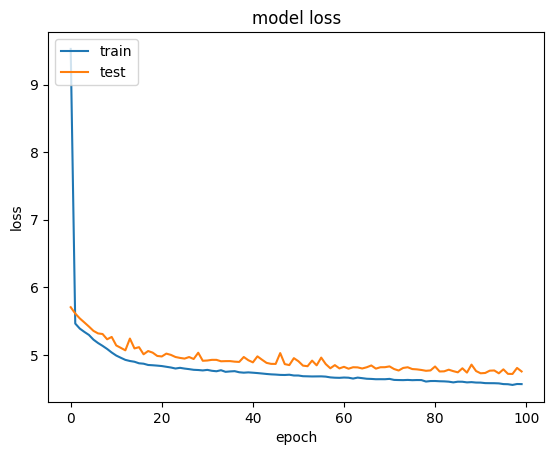

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

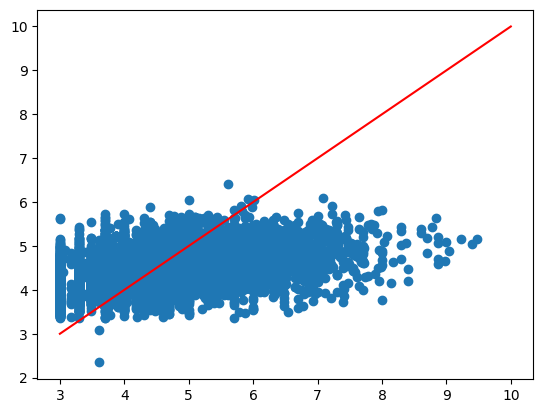

In [9]:
plt.scatter(np.log10(y_test), np.log10(predictions))
plt.plot([3, 10], [3, 10], color="red")

In [8]:
print(X_test)
print(y_test)
print(NN_model.predict(X_test))

       DURATION         LON        LAT         AREA  FATALITY     slope  \
3931        0.0  -71.993131  42.402035   336.554288  0.390856  1.545443   
10446       2.0  -95.097700  39.374700    32.169909  0.390856  3.114328   
35135       0.0 -112.186900  32.925900  1359.178646  0.390856  1.439133   
6252        0.0  -74.367644  43.006869   336.554288  0.390856  2.812148   
7299        2.0  -80.609519  40.272015   336.554288  0.390856  2.117308   
...         ...         ...        ...          ...       ...       ...   
27141       0.0  -74.820500  42.253300     8.042477  0.390856  8.455138   
19125       0.0  -91.230600  35.436200     8.042477  0.390856  0.927410   
16247       4.0  -90.358400  40.717100    32.169909  0.390856  0.618303   
95          2.0  -73.928737  42.653967   336.554288  0.390856  5.358974   
18874       0.0  -89.232700  34.087200   201.061930  0.390856  0.969312   

         dem   LULC  DISTANT_RIVER    CONT_AREA  ...  WEST VIRGINIA  \
3931   255.0  115.0       1.